# Data-Oriented Plasticity

Demonstration of training and application of machine learning (ML) flow rule to capture the yield onset obtained for different microstructures. The <a rel="article" href="https://www.mdpi.com/1996-1944/13/7/1600#">scientific background</a> of this work is described in the open access article A. Hartmaier "Data-Oriented Constitutive Modeling of Plasticity in Metals" *Materials* 2020, 13(7), 1600.

### Dependencies:
 - [pyLabFEA](https://github.com/AHartmaier/pyLabFEA.git) for data-oriented material definitions and Finite Element Analysis (FEA)
 - [NumPy](http://numpy.scipy.org) for array handling
 - [Scipy](https://www.scipy.org/) for numerical solutions
 - [scikit-learn](https://scikit-learn.org/stable/) for machine learning algorithms
 - [MatPlotLib](https://matplotlib.org/) for graphical output
 - [pandas](https://pandas.pydata.org/) for data import

Author: Alexander Hartmaier, ICAMS, Ruhr-Universtität Bochum, June 2020</br>
Micromechanical simulations and data repositories: Abhishek Biswas, ICAMS, Ruhr-University Bochum


This work is licensed under a Creative 
Commons Attribution-NonCommercial-ShareAlike 4.0 International License
<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">(CC-BY-NC-SA)</a>
 <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">
<img alt="Creative Commons License" style="border-width:0;max-heigt:9px;height:100%;" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a>

## 1. Define Materials from Data Sets

Read input data produced from micromechanical simulations from data repository.

pyLabFEA version 3.3

*** Microstructure: texture5_inclShear ***
53999  data points imported into database  Random-shear
Data for flow stresses at various plastic strains imported.
Texture  100%_Random with texture parameter:  0.0
*** Warning: Large hydrostatic stresses: minimum p= 0.00 MPa, maximum p= 1.24 MPa
Number of load cases:  215 ; with  3449  data points around yield point
Estimated elasic constants: E=152.41 GPa, nu=0.30
Estimated yield strength: 48.01 MPa, from 3449 data sets with PEEQ approx. 0.002


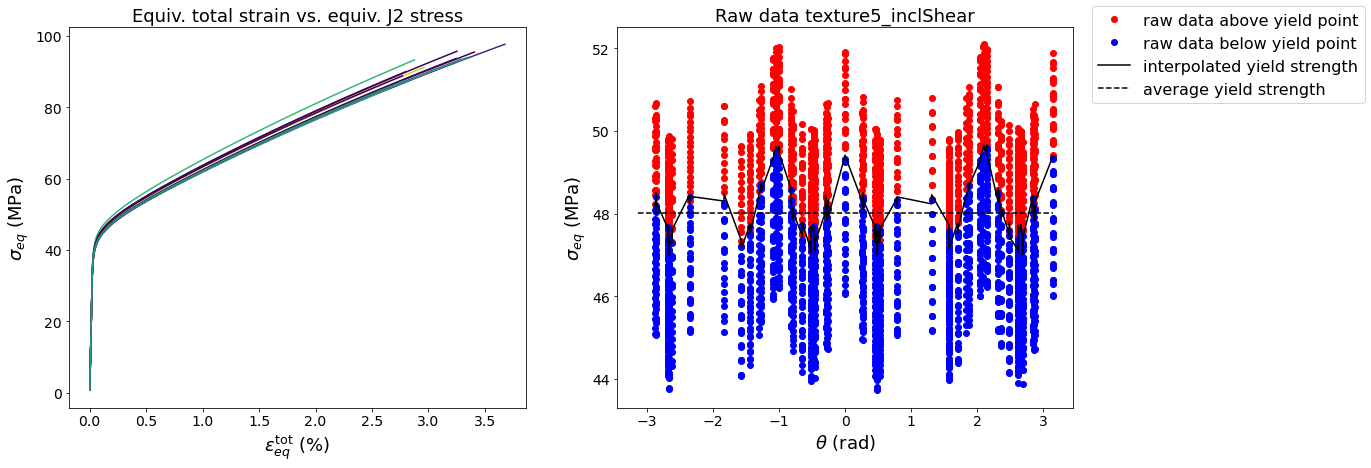


###   Data set "Random-shear"  ###
Type of microstructure:  Random
Imported 1 data sets for textures, with 1 hardening stages and 430 load cases each.
Averaged properties : E_av=152.41 GPa, nu_av=0.30, sy_av=48.01 MPa
{'ms_type': 'Random', 'Npl': 1, 'Nlc': 430, 'Ntext': 1, 'texture': array([0.]), 'tx_name': ['100%_Random'], 'peeq_max': 0.02879952858162597, 'epc': 0.002, 'work_hard': array([0.002])}

*** Microstructure: texture5 ***
38898  data points imported into database  Random-princ
Data for flow stresses at various plastic strains imported.
Texture  100%_Random with texture parameter:  0.0
Number of load cases:  359 ; with  4580  data points around yield point
Estimated elasic constants: E=150.27 GPa, nu=0.30
Estimated yield strength: 44.97 MPa, from 4580 data sets with PEEQ approx. 0.002


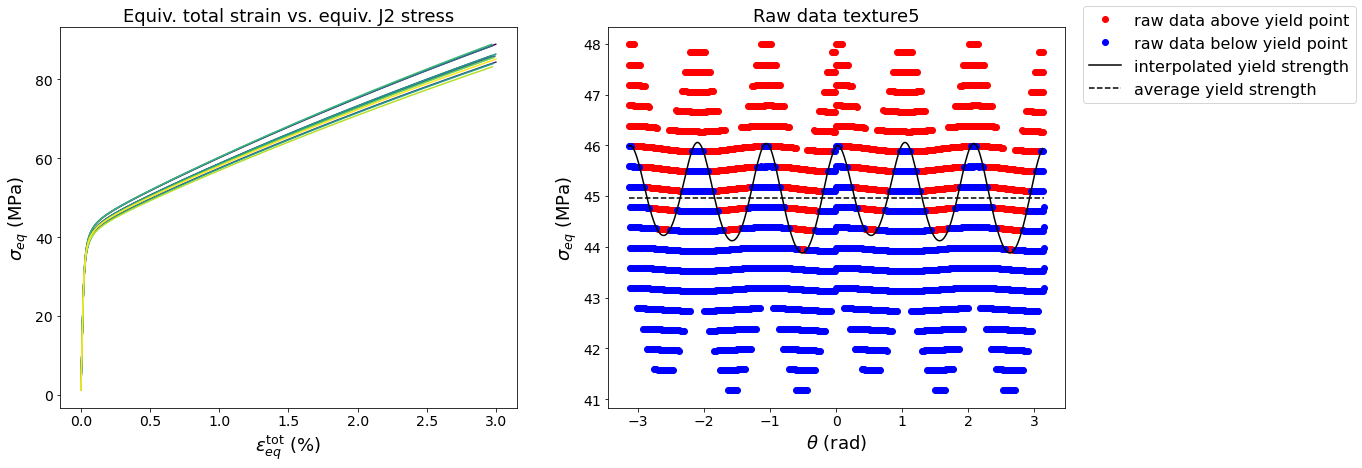


###   Data set "Random-princ"  ###
Type of microstructure:  Random
Imported 1 data sets for textures, with 1 hardening stages and 358 load cases each.
Averaged properties : E_av=150.27 GPa, nu_av=0.30, sy_av=44.97 MPa
{'ms_type': 'Random', 'Npl': 1, 'Nlc': 358, 'Ntext': 1, 'texture': array([0.]), 'tx_name': ['100%_Random'], 'peeq_max': 0.027353499031730812, 'epc': 0.002, 'work_hard': array([0.002])}

*** Microstructure: texture6_inclShear ***
53999  data points imported into database  Goss-shear
Data for flow stresses at various plastic strains imported.
Texture  100%_Goss with texture parameter:  1.0
*** Warning: Large hydrostatic stresses: minimum p= 0.00 MPa, maximum p= 1.25 MPa
Number of load cases:  215 ; with  3367  data points around yield point
Estimated elasic constants: E=151.22 GPa, nu=0.30
Estimated yield strength: 46.76 MPa, from 3367 data sets with PEEQ approx. 0.002


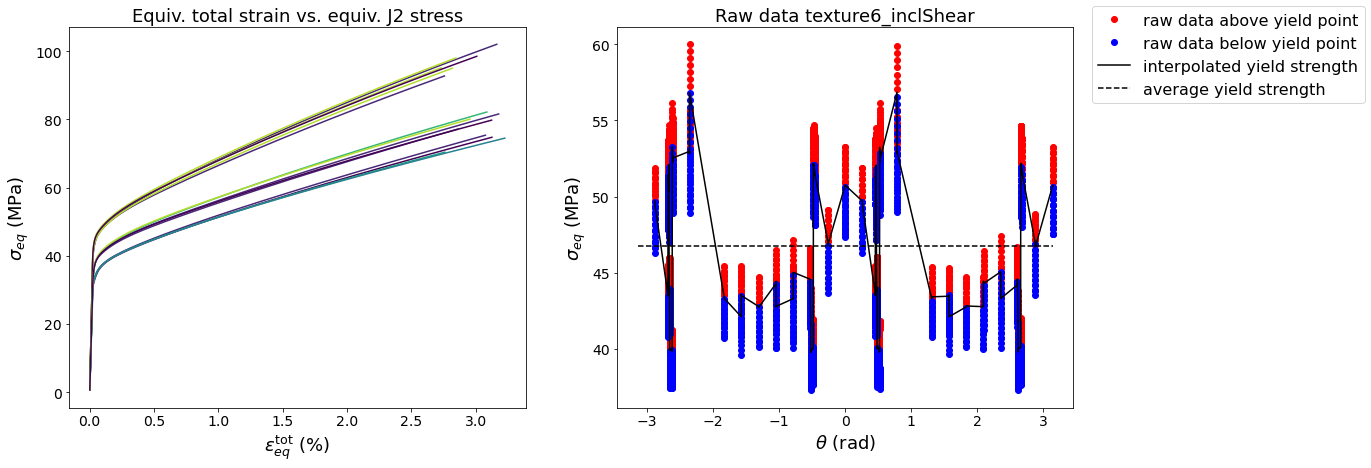


###   Data set "Goss-shear"  ###
Type of microstructure:  Goss
Imported 1 data sets for textures, with 1 hardening stages and 430 load cases each.
Averaged properties : E_av=151.22 GPa, nu_av=0.30, sy_av=46.76 MPa
{'ms_type': 'Goss', 'Npl': 1, 'Nlc': 430, 'Ntext': 1, 'texture': array([1.]), 'tx_name': ['100%_Goss'], 'peeq_max': 0.025152903180249032, 'epc': 0.002, 'work_hard': array([0.002])}

*** Microstructure: texture6 ***
33685  data points imported into database  Goss-princ
Data for flow stresses at various plastic strains imported.
Texture  100%_Goss with texture parameter:  1.0
*** Warning: Large hydrostatic stresses: minimum p= 0.00 MPa, maximum p= 1.18 MPa
Number of load cases:  359 ; with  3960  data points around yield point
Estimated elasic constants: E=136.83 GPa, nu=0.30
Estimated yield strength: 45.31 MPa, from 3960 data sets with PEEQ approx. 0.002


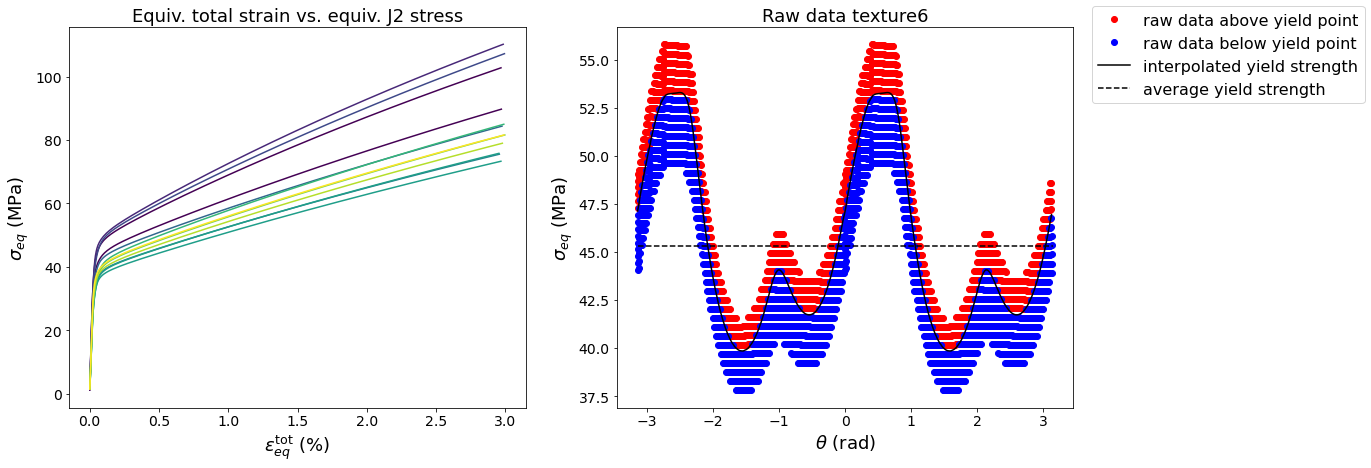


###   Data set "Goss-princ"  ###
Type of microstructure:  Goss
Imported 1 data sets for textures, with 1 hardening stages and 358 load cases each.
Averaged properties : E_av=136.83 GPa, nu_av=0.30, sy_av=45.31 MPa
{'ms_type': 'Goss', 'Npl': 1, 'Nlc': 358, 'Ntext': 1, 'texture': array([1.]), 'tx_name': ['100%_Goss'], 'peeq_max': 0.026722268645795078, 'epc': 0.002, 'work_hard': array([0.002])}


In [2]:
import pylabfea as FE
import numpy as np
from scipy.optimize import fsolve
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
print('pyLabFEA version',FE.__version__)

#set path truncs and open JSON file
path_data='/Users/alexander/Data/ML-FlowRule/Data/'
path_json=path_data+'Metadata/'
#import data sets for random texture
data_RS = FE.Data(['texture5_inclShear'], path_data, path_json=path_json, name="Random-shear", \
                 sdim=6, epl_crit=0.002, d_ep=1.e-3, npe=1, plot=True)
data_RP = FE.Data(['texture5'], path_data, path_json=path_json, name="Random-princ", 
                  sdim=3, mirror=True, epl_crit=0.002, d_ep=1.e-3, npe=1, plot=True)

#import data sets for Goss texture
data_GS = FE.Data(['texture6_inclShear'], path_data, path_json=path_json, name="Goss-shear", \
                 sdim=6, epl_crit=0.002, d_ep=1.e-3, npe=1, plot=True)
data_GP = FE.Data(['texture6'], path_data, path_json=path_json, name="Goss-princ", 
                  sdim=3, mirror=True, epl_crit=0.002, d_ep=1.e-3, npe=1, plot=True)
dsets = [data_RS, data_RP, data_GS, data_GP]

### Plot filtered data defining the yield locus

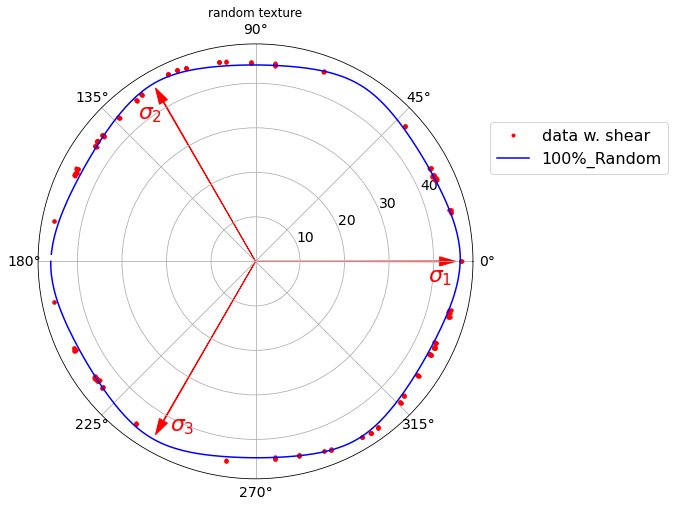

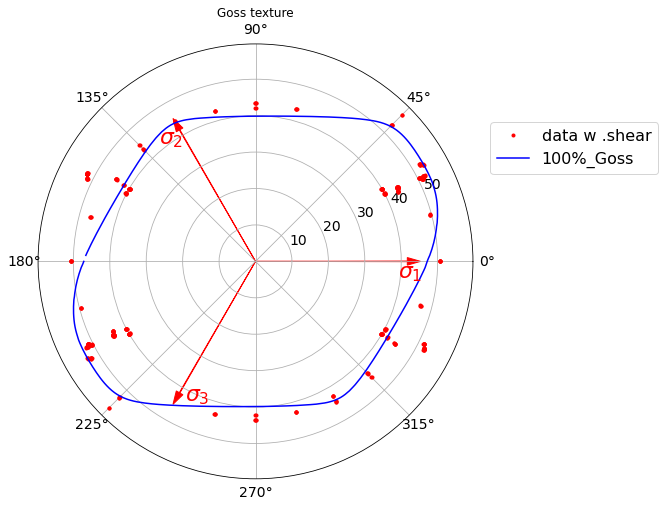

In [3]:
hh=data_RP.mat_param['flow_seq_av'][0,0]/data_RS.mat_param['flow_seq_av'][0,0]
data_RP.plot_yield_locus('texture', data=hh*data_RS.mat_param['flow_stress'][0,0,:,:],
                         data_label='data w. shear', title='random texture', arrow=True)
data_GP.plot_yield_locus('texture', data=data_GS.mat_param['flow_stress'][0,0,:,:], 
                         data_label='data w .shear', title='Goss texture', arrow=True)

## 2. Fit parameters for Hill and Barlat Yld2004-18p yield functions to data

Plot results in deviatoric plane of principal stress space together with raw data. No stress transformation are applied, i.e. all equivalent stresses are J2 equivalent stresses.


***Fitting Hill yield function to data set texture5_inclShear of type Random-shear
Starting values: x0= [48.01206983  1.          1.          1.          1.          1.
  1.        ] , Objective fct= 0.23312012810733032
Maximum number of function evaluations has been exceeded.
Objective fct=  0.04662734365931123 @ x =  [11.29057758  0.05559516  0.05359804  0.05406539  0.05701699  0.05706559
  0.05738966]

***Fitting Barlat Yld2004-18p yield function to data set texture5_inclShear of type Random-shear
Starting values: x0= [44.33154371, 0.98211849, 1.11643622, 0.85654869, 1.08910642, 1.04286895, 0.98617041, 1.08936011, 1.11321424, 1.02241694, 0.88233684, 0.83467811, 0.83203876, 0.84849557, 0.47868782, 0.59733239, 0.67739974, 0.65233, 0.73577586] , Objective fct= 0.05800420988305883
Maximum number of function evaluations has been exceeded.
Objective fct=  0.05673943078402484 @ x =  [43.82953321  1.03155087  1.07605137  0.87533903  1.19447851  0.98930576
  0.93078813  1.13379728  1.052649

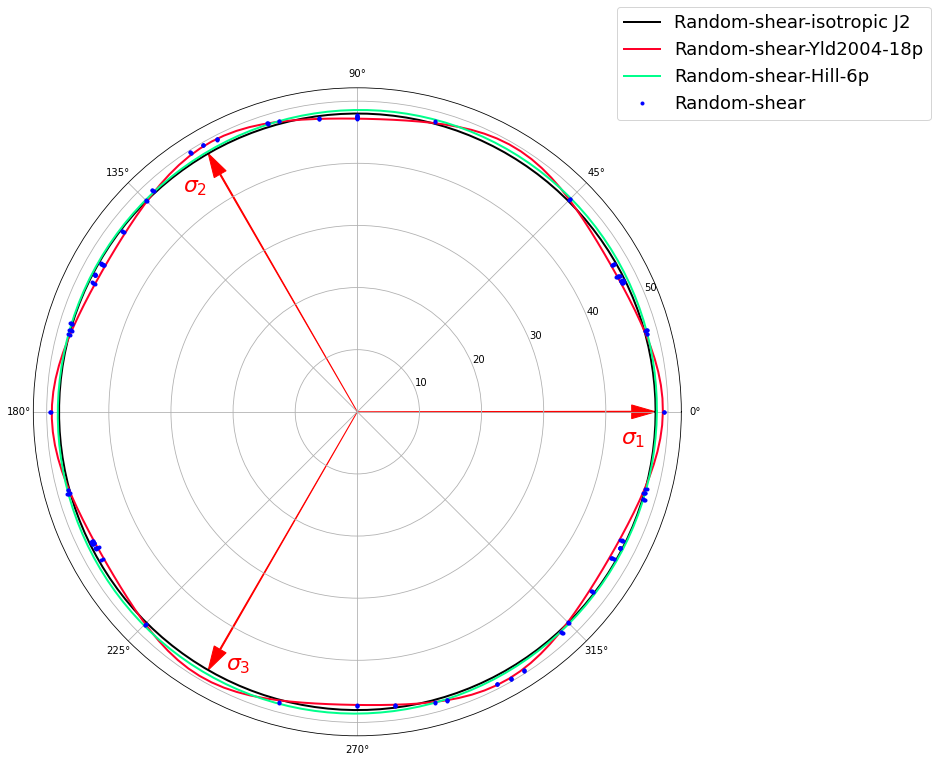


***Fitting Hill yield function to data set texture5 of type Random-princ
Starting values: x0= [44.96822454  1.          1.          1.          1.          1.
  1.        ] , Objective fct= 0.3139030468949692
Maximum number of function evaluations has been exceeded.
Objective fct=  0.004367783361952413 @ x =  [ 6.31820406e-01  1.96995705e-04  1.99721156e-04  1.97736835e-04
  6.02193027e+00 -4.76864139e-01 -3.04069681e+00]

***Fitting Barlat Yld2004-18p yield function to data set texture5 of type Random-princ
Starting values: x0= [38.2274837, 0.178574682, 0.847242656, 0.0230925795, 0.247912765, 0.510652969, 1.32056519, -14.4492171, 2.13840585, -19.3947158, 1.70772912, 1.2571968, 0.0386422287, 0.462424603, 0.472577779, 0.316602888, -10.0064468, 22.307856, -17.1440064] , Objective fct= 0.044080922287612616
Maximum number of function evaluations has been exceeded.
Objective fct=  0.04211952443106094 @ x =  [ 3.78161518e+01  1.76560128e-01  7.54117774e-01  2.59449792e-03
  2.54821635e-01  

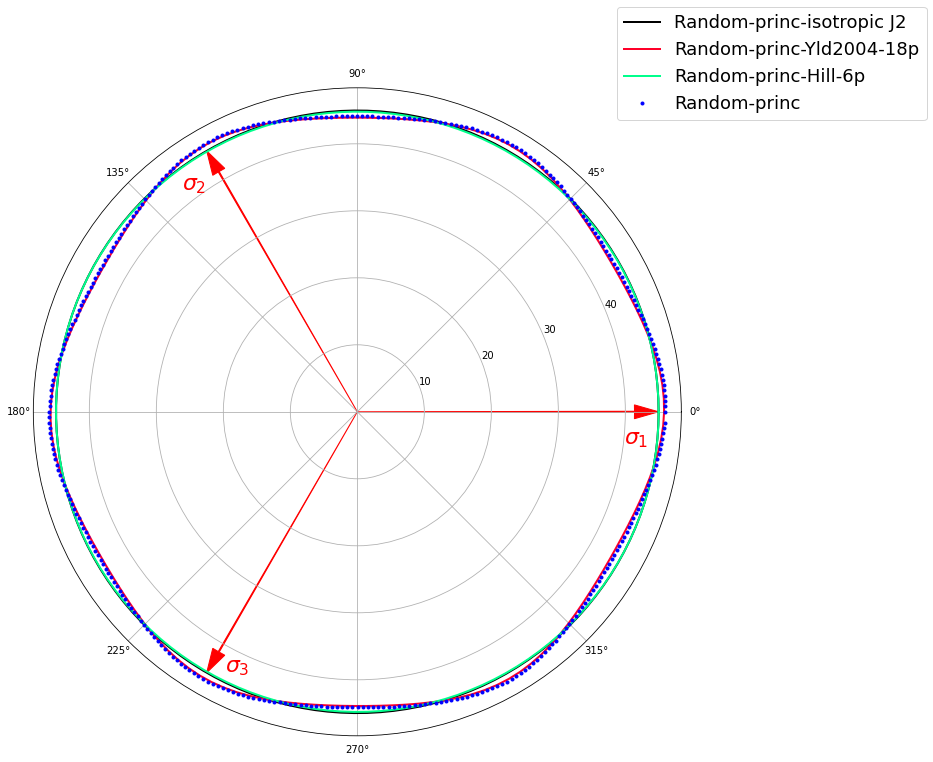


***Fitting Hill yield function to data set texture6_inclShear of type Goss-shear
Starting values: x0= [46.76105314  1.          1.          1.          1.          1.
  1.        ] , Objective fct= 1.5302469777540186
Maximum number of function evaluations has been exceeded.
Objective fct=  0.047225878312624245 @ x =  [3.74042141e+00 7.03911265e-03 1.03216955e-02 2.86701813e-03
 3.29878963e-03 1.02318143e-02 6.06265090e-03]

***Fitting Barlat Yld2004-18p yield function to data set texture6_inclShear of type Goss-shear
Starting values: x0= [45.3551096, 0.969697326, -0.548511845, 0.395406107, 1.0221489, -0.142708792, 0.734066784, 0.394440726, 0.171939065, 1.28287903, 0.836898012, 0.714152648, 0.214470624, 0.702905982, 1.03255268, 0.0115425582, 0.85958614, 1.74419676, 0.0069224217] , Objective fct= 0.22742700675286484
Maximum number of function evaluations has been exceeded.
Objective fct=  0.10378221745435955 @ x =  [ 1.20923760e+01 -1.31358796e+00 -1.40444929e+00  1.50296978e+00
  4.299

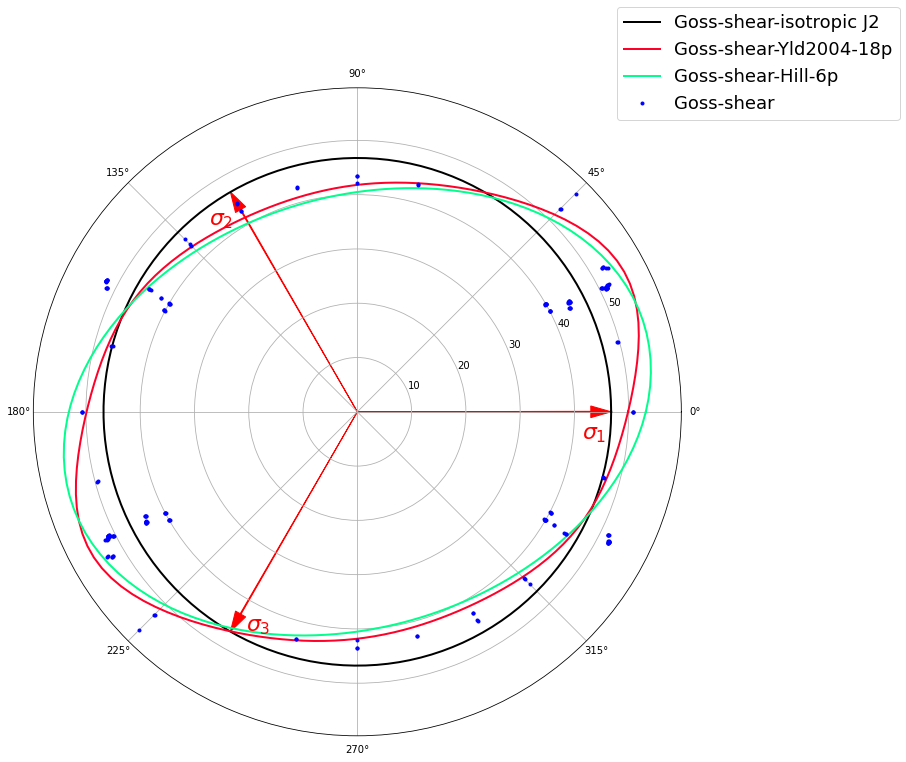


***Fitting Hill yield function to data set texture6 of type Goss-princ
Starting values: x0= [45.30585103  1.          1.          1.          1.          1.
  1.        ] , Objective fct= 1.9000280805004797
Maximum number of function evaluations has been exceeded.
Objective fct=  0.0007809255312345119 @ x =  [ 3.81507926e-02  7.85514062e-07  9.39662742e-07  4.11671699e-07
  2.99019950e+00  1.66858616e+00 -2.84963852e-01]

***Fitting Barlat Yld2004-18p yield function to data set texture6 of type Goss-princ
Starting values: x0= [45.0, 1.40792365, 1.57426462, -0.959295192, 0.320058208, -1.35350872, -0.763089854, -430.051748, -493.701424, 477.627338, 1.20385531, 1.55757838, -0.542840056, 0.572625042, -0.898093261, 0.152305241, -125.687838, -32.4138585, 354.58841] , Objective fct= 11.424016357180975
Maximum number of function evaluations has been exceeded.
Objective fct=  0.0376245817745921 @ x =  [ 1.70628062e+01  1.46524195e+00  1.58072007e+00 -9.23380266e-01
  2.69781520e-01 -1.38830632

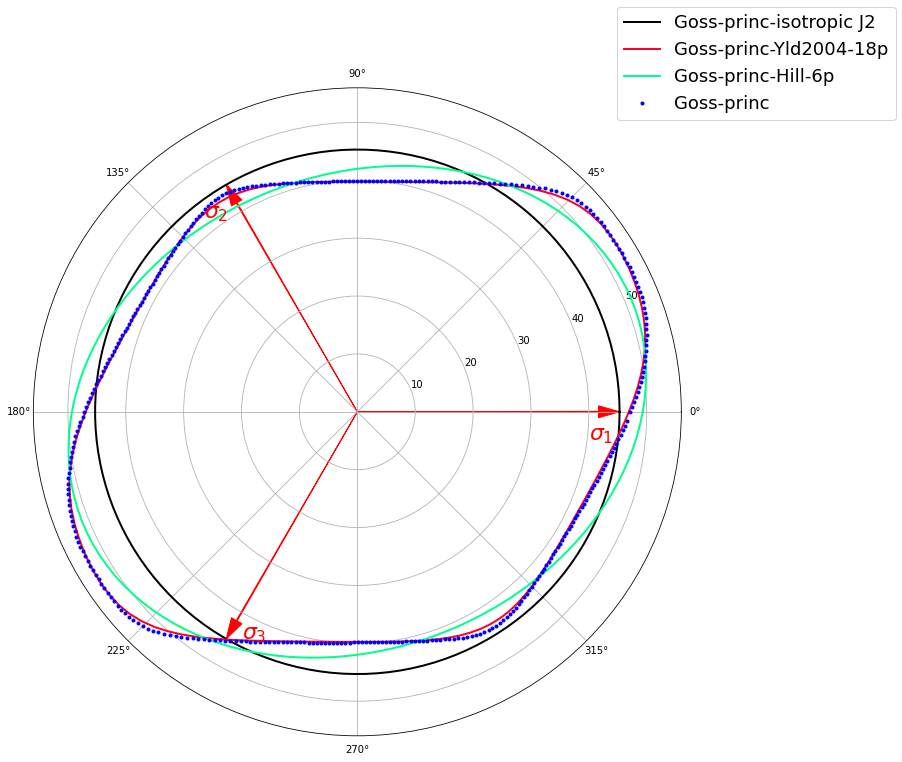

In [15]:
materials_Hill = []
materials_Barlat = []
materials_iso = []
Bar_a=8 #BCC:a=6, FCC:a=8, J2:a=2
for data in dsets:
    dset = data.set[0]
    mat_iso = FE.Material(name=data.name+'-isotropic J2')
    mat_iso.elasticity(E=dset.E, nu=dset.nu)
    mat_iso.plasticity(sy=dset.sy)
    materials_iso.append(mat_iso)
    'objective fct for Hill yield fct'
    def dif_yfH(x):
        'Calculate square of differences between flow rule to data points'
        mat = FE.Material()
        mat.elasticity(E=dset.E, nu=dset.nu)
        mat.plasticity(sy=x[0],hill=x[1:7], hill_6p=True)
        d = np.linalg.norm(mat.calc_yf(dset.syld))/dset.sy
        return d
    
    'objective fct for Barlat Yld2004-18p yield fct'
    def dif_yfB(x):
        'Calculate square of differences between flow rule to data points'
        mat = FE.Material()
        mat.elasticity(E=dset.E, nu=dset.nu)
        mat.plasticity(sy=x[0],barlat=x[1:19],barlat_exp=Bar_a)
        d = np.linalg.norm(mat.calc_yf(dset.syld))/dset.sy
        return d
    
    'Fit Hill yield fct to data set'
    x0 = np.ones(7)
    x0[0] = dset.sy
    y0 = dif_yfH(x0)
    print('\n***Fitting Hill yield function to data set',dset.name,'of type',data.name)
    print('Starting values: x0=',x0,', Objective fct=',y0)
    res = minimize(dif_yfH, x0, method='Nelder-Mead')
    x = res.x
    print(res.message)
    print('Objective fct= ',dif_yfH(x), '@ x = ',x)
    'define material with optimized Hill parameters'
    mat_h = FE.Material(name=data.name+'-Hill-6p')
    mat_h.elasticity(E=dset.E, nu=dset.nu)
    mat_h.plasticity(sy=x[0], hill=x[1:7])
    materials_Hill.append(mat_h)
    
    'Fit Barlat Yld2004-18p yield fct to data set'
    #Bar=[1.241, 1.078, 1.216, 1.224, 1.093, 0.8892, 0.5019, 0.5572, 1.349, 
    #     0.7754, 0.9227, 0.7655, 0.7934, 0.9187, 1.028, 1.116, 1.112, 0.5898] # example from paper
    if data.name=='Random-shear':
        x0 = [44.33154371, 0.98211849, 1.11643622, 0.85654869, 1.08910642, 1.04286895, 0.98617041, 
              1.08936011, 1.11321424, 1.02241694, 0.88233684, 0.83467811, 0.83203876, 0.84849557, 
              0.47868782, 0.59733239, 0.67739974, 0.65233, 0.73577586]
        # Random-shear (O=0.05800420991504569)
    elif data.name=='Random-princ':
        x0 = [3.82274837e+01, 1.78574682e-01,  8.47242656e-01,  2.30925795e-02, 2.47912765e-01, 
              5.10652969e-01,  1.32056519e+00, -1.44492171e+01, 2.13840585e+00, -1.93947158e+01, 
              1.70772912e+00, 1.25719680e+00, 3.86422287e-02, 4.62424603e-01, 4.72577779e-01, 
              3.16602888e-01, -1.00064468e+01, 2.23078560e+01, -1.71440064e+01]
        # Random-princ (O=0.04408092157145577)
    elif data.name=='Goss-shear':
        x0 = [4.53551096e+01,  9.69697326e-01, -5.48511845e-01,  3.95406107e-01, 1.02214890e+00,
              -1.42708792e-01,  7.34066784e-01,  3.94440726e-01, 1.71939065e-01,  1.28287903e+00, 
              8.36898012e-01, 7.14152648e-01, 2.14470624e-01,  7.02905982e-01,  1.03255268e+00, 
              1.15425582e-02, 8.59586140e-01, 1.74419676e+00, 6.92242170e-03]
        # Goss-shear (O=0.2274270064844414)
    elif data.name=='Goss-princ':
        x0 = [ 45.,  1.40792365e+00,  1.57426462e+00, -9.59295192e-01,  3.20058208e-01, 
              -1.35350872e+00, -7.63089854e-01, -4.30051748e+02, -4.93701424e+02,  4.77627338e+02, 
              1.20385531e+00,  1.55757838e+00, -5.42840056e-01,  5.72625042e-01, -8.98093261e-01, 
              1.52305241e-01, -1.25687838e+02, -3.24138585e+01, 3.54588410e+02]
        # Goss-princ (O=)
    else:
        x0 = np.ones(19)
        x0[0] = dset.sy*0.6

    y0 = dif_yfB(x0)
    print('\n***Fitting Barlat Yld2004-18p yield function to data set',dset.name,'of type',data.name)
    print('Starting values: x0=',x0,', Objective fct=',y0)
    res = minimize(dif_yfB, x0, method='Nelder-Mead')
    x = res.x
    print(res.message)
    print('Objective fct= ',dif_yfB(x), '@ x = ',x)
    'define material with optimized Barlat parameters'
    mat_b = FE.Material(name=data.name+'-Yld2004-18p')
    mat_b.elasticity(E=dset.E, nu=dset.nu)
    mat_b.plasticity(sy=x[0], barlat=x[1:19], barlat_exp=Bar_a)
    materials_Barlat.append(mat_b)

    print('\nPlot polar angle vs. J2 equivalent yield stress for different yield functions together with data')
    mat_iso.polar_plot_yl(cmat=[mat_b, mat_h], data=dset.syc, dname=data.name, 
                          Na=144, arrow=True)#, scaling=mat_h.sy)


## Plot Barlat yield function together with data in transformed stress space

Use Barlat rule for linear transformation of data points and project on deviatoric plane in principal stress space. Upon Barlat ransformation, yield locus transforms into a circle with a constant yield stress.

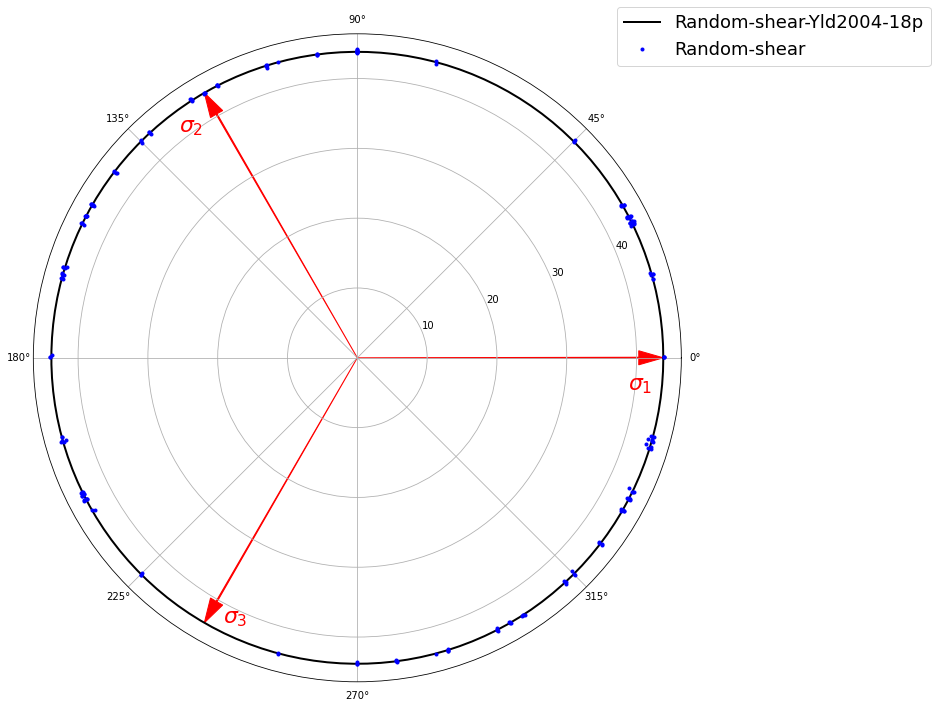

Random-shear : Relative scatter of Barlat equivalent stresses at yield onset: 0.424 %


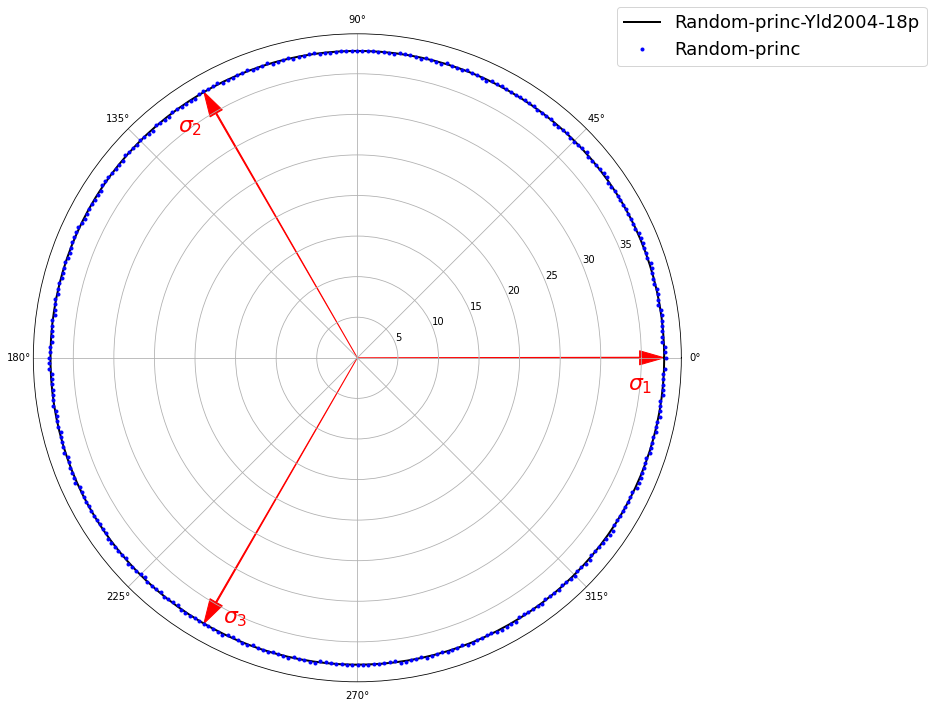

Random-princ : Relative scatter of Barlat equivalent stresses at yield onset: 0.264 %


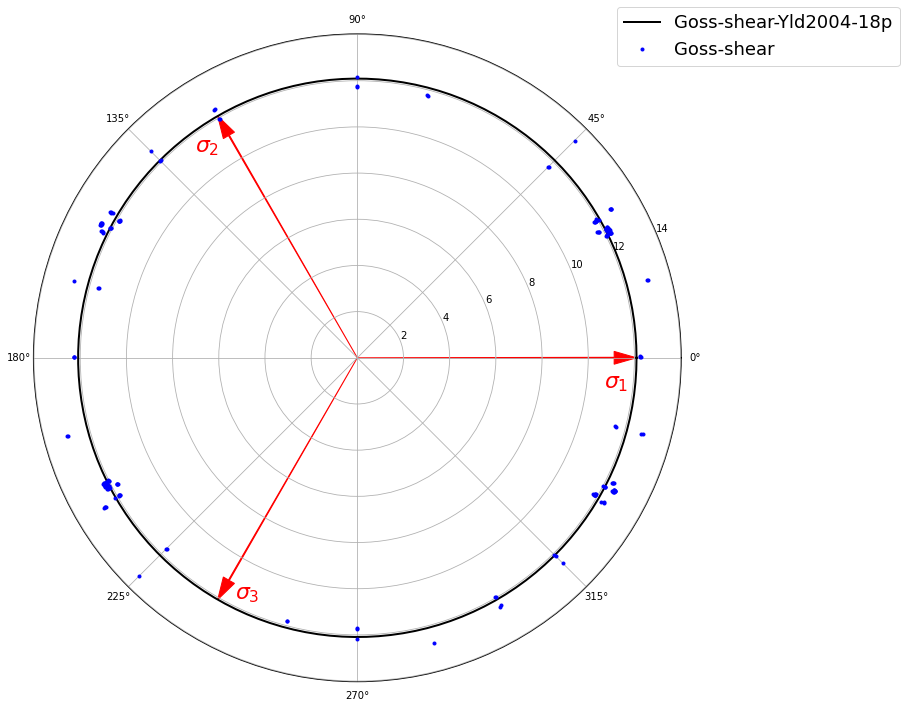

Goss-shear : Relative scatter of Barlat equivalent stresses at yield onset: 2.603 %


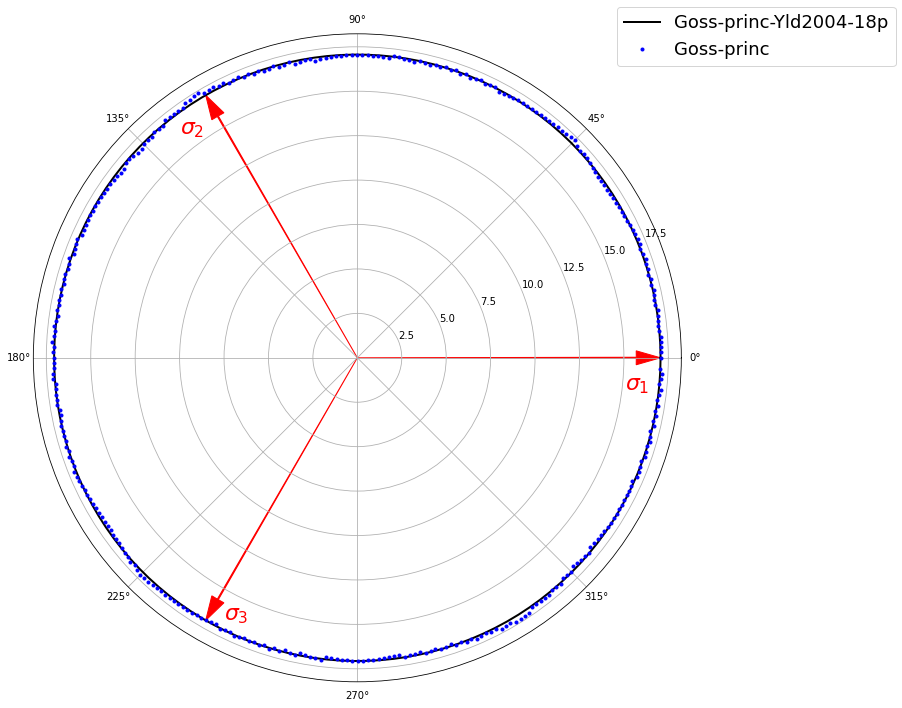

Goss-princ : Relative scatter of Barlat equivalent stresses at yield onset: 0.527 %


In [16]:
for i,data in enumerate(dsets):
    mb = materials_Barlat[i]
    dset = data.set[0]
    #print(dset.syld[0:5,:])
    scB_yld = FE.s_cyl(dset.syld,mb)
    #print(scB_yld[0:5,0])
    std = np.std(scB_yld[:,0])
    hh = 100*std/mb.sy
    mb.polar_plot_yl(data=scB_yld, dname=data.name, Na=144, arrow=True, sJ2=False)
    print(data.name,': Relative scatter of Barlat equivalent stresses at yield onset:', hh.round(3),'%' )

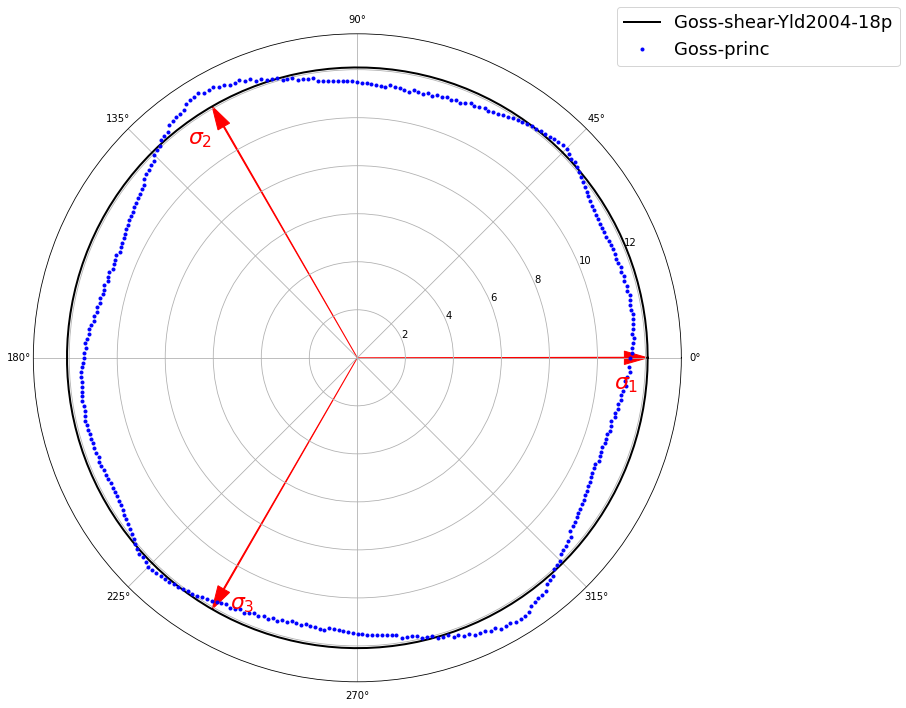

Goss-shear-Yld2004-18p  material model applied to data from  Goss-princ
Goss-princ : Relative scatter of Barlat equivalent stresses at yield onset: 4.042 %


In [17]:
# Applying Barlat model obtained from data with shear stresses to the Goss-princ data set
mb = materials_Barlat[2]
dset = data_GP.set[0]
scB_yld = FE.s_cyl(dset.syld,mb)
std = np.std(scB_yld[:,0])
hh = 100*std/mb.sy
mb.polar_plot_yl(data=scB_yld, dname=data.name, Na=144, arrow=True, sJ2=False)
print(mb.name,' material model applied to data from ', data.name)
print(data.name,': Relative scatter of Barlat equivalent stresses at yield onset:', hh.round(3),'%' )

## 3. Train ML flow rule to different data sets

In [ ]:
materials_ML = []
for data in dsets:
    'define material as basis for ML flow rule'
    mat_ml = FE.Material(name='ML-'+data.name)     # define material 
    mat_ml.elasticity(E=data.E_av, nu=data.nu_av)  # assign average properties to material
    mat_ml.plasticity(sy=data.sy_av)               # assessed from data
    mat_ml.microstructure(data.mat_param)          # define microstructural parameters for material
    'train SVC with data from all hardening levels is set'
    mat_ml.train_SVC(C=17, gamma=3., fs=0.3, plot=True)
    materials_ML.append(mat_ml)


## 4. Comparing analytical and ML yield functions

In [ ]:
for i in range(3):
    mat_ml = materials_ML[i]
    mat_h = materials_Hill[i]
    mat_b = materials_Barlat[i]
    mat_ml.set_texture(1.)
    mat_ml.set_workhard(0.)
    sfl = mat_ml.msparam[0]['flow_stress'][0,0,:,:]
    mat_ml.plot_yield_locus(ref_mat=mat_b, Nmesh=200,
                      axis1=[0,1,2], axis2=[1,2,0], xstart=-2., xend=2.)
    #plt.savefig('comp_YL_all'+mat_ml.msparam[0]['ms_type']+'.pdf',format='pdf',dpi=300)
    plt.show()

    print('Polar plot of ML yield function, ML yield locus and data on deviatoric stress plane')
    mat_ml.polar_plot_yl(field=True, data=sfl, predict=False, Na=180, file='polar_ML_data-'+mat_ml.msparam[0]['ms_type'])
    print('Polar plot of ML, Hill and Barlat yield loci and data on deviatoric stress plane')
    mat_ml.polar_plot_yl(scaling=mat_ml.sy, data=sfl, cmat=[mat_h, mat_b], Na=180, file='polar_all-'+mat_ml.msparam[0]['ms_type'])

In [ ]:
mat_ml = materials_ML[1] # example for Goss texture
mat_ref = materials_Hill[1] # Hill model as reference, Barlat gradient not implemented
print('\n\n====== Stress-Strain-Curves ======')
mat_ml.set_texture(1.)
mat_ml.set_workhard(0.)
mat_ml.calc_properties(verb=False, eps=0.0013, sigeps=True, min_step=4)
mat_ml.plot_stress_strain(file='sig-eps-Goss-ML')

mat_ref.calc_properties(eps=0.0015, sigeps=True, min_step=5)
mat_ref.plot_stress_strain(Hill=False, file='sig-eps-Goss-Hill')

'plot yield locus'
ax = mat_ml.plot_yield_locus(xstart=-1.8, xend=1.8, ref_mat=mat_ref, field=False, Nmesh=400)
print('Plot evolution of stresses during plastic deformation for both material')
print('Hill-material: blue colors')
print('ML-material: yellow colors')
s=80
'Hill material'
stx = mat_ref.sigeps['stx']['sig'][:,0:2]/mat_ref.sy
sty = mat_ref.sigeps['sty']['sig'][:,0:2]/mat_ref.sy
et2 = mat_ref.sigeps['et2']['sig'][:,0:2]/mat_ref.sy
ect = mat_ref.sigeps['ect']['sig'][:,0:2]/mat_ref.sy
ax.scatter(stx[1:,0],stx[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')
ax.scatter(sty[1:,0],sty[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')
ax.scatter(et2[1:,0],et2[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')
ax.scatter(ect[1:,0],ect[1:,1],s=s*2.5, c='#0000ff', edgecolors='k')

'ML material'
stx = mat_ml.sigeps['stx']['sig'][:,0:2]/mat_ml.sy
sty = mat_ml.sigeps['sty']['sig'][:,0:2]/mat_ml.sy
et2 = mat_ml.sigeps['et2']['sig'][:,0:2]/mat_ml.sy
ect = mat_ml.sigeps['ect']['sig'][:,0:2]/mat_ml.sy
ax.scatter(stx[1:,0],stx[1:,1],s=s, c='#f0ff00', edgecolors='k')
ax.scatter(sty[1:,0],sty[1:,1],s=s, c='#f0ff00', edgecolors='k')
ax.scatter(et2[1:,0],et2[1:,1],s=s, c='#f0ff00', edgecolors='k')
ax.scatter(ect[1:,0],ect[1:,1],s=s, c='#f0ff00', edgecolors='k')
plt.savefig('deform-Goss-YL.pdf',format='pdf',dpi=300)
plt.show()

In [ ]:
fem = FE.Model(dim=2, planestress=True)   # call class to generate object for finite element model
fem.geom([1], LY=1.)   
fem.assign([mat_ml]) 
fem.bcleft(0.)                    
fem.bcbot(0.)
fem.mesh(NX=2, NY=2)
eps_list=np.linspace(0.0002,0.002,3)
eps = []
sig = []
epl = []
for et in eps_list:
    fem.bctop(et, 'disp')
    fem.bcright(0, 'disp') 
    fem.solve()      
    eps.append(fem.glob['eps'])
    sig.append(fem.glob['sig'])
    epl.append(fem.glob['epl'])
eps = np.array(eps)
sig = np.array(sig)
epl = np.array(epl)
print(eps[:,1],sig[:,1],epl[:,1])
plt.plot(eps[:,1],sig[:,1],'-r')
ax = mat_ml.plot_yield_locus(iso=True, scaling=False)
for sv in sig:
    sp = FE.Stress(sv).p
    ax.scatter(sp[0],sp[1],s=60, c='#00f0ff', edgecolors='k')